predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000
Test MSE: 6958.324


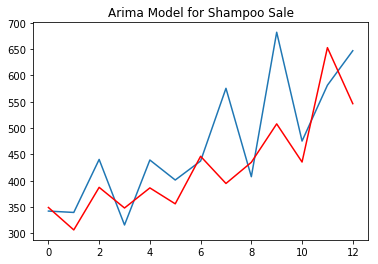

In [62]:
# 12.2
# Fetching data
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
# Read Data from CSV dile
series = read_csv('sales-of-shampoo-over-a-three-year-Copy.csv', header=0, \
                  parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
                      
# Split in train and test data                     
X = series.values
size = int(len(X) * 0.65)
train, test = X[0:size], X[size:len(X)]

# Applying Arima model
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)

#Printing the MSE values
print('Test MSE: %.3f' % error)

# plot the graph
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.title('Arima Model for Shampoo Sale')
pyplot.show()